# COVID Data and EDA


### The Data
   * COVID case data compiled by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University and stored [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#usa-daily-state-reports-csse_covid_19_daily_reports_us)
   * Census population data from [Kaggle](https://www.kaggle.com/peretzcohen/2019-census-us-population-data-by-state), for scaling case numbers 
   * CDC Vaccine Data (processed in `vaccine_data_processing.ipynb`)
   * NOAA Weather Data (processed in `weather_data_processing.ipynb`)
 
#### Data Processing 

The data sets have already been cleaned and processing for key features and saved to the `data/` folder. This file will load and merge the datasets listed above into a single dataframe. 

#### Train/Validation/Test Splitting

Before we explore the data, we need to split the data into training, validation, and testing data so that insights for the latter two do not affect the analysis and model training. Since we have time series data, the testing and validation data should represent the most recent data. Our COVID data spans 04-2020 to 03-2021, or 12 months. We will reserve 2 months each for validation and testing, leaving the first 8 months for training data. 

### Exploratory Data Analysis



## Loading and Combining Data

In [489]:
# data handling
import pandas as pd
import numpy as np

# seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [490]:
covid_data = pd.read_csv('../data/processed_us_daily_reports.csv', index_col=0)
hist_weather_data = pd.read_csv('../data/historical_monthly_temp_avgs_by_state.csv', index_col=0)
all_weather = pd.read_csv('../data/all_weather_data.csv', index_col=0)
monthly_weather_data = pd.read_csv('../data/monthly_temps_by_state.csv', index_col=0)
vaccine_data = pd.read_csv('../data/vaccine_data.csv', index_col=0)

In [491]:
covid_data.loc[:,'Date'] = pd.to_datetime(covid_data['Date'])
covid_data.head()

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Deaths_rate_diff,Recovered,Recovered_rate,Recovered_diff,Recovered_rate_diff,Active,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,NaN,NaN,NaN,NaN,3470.0,NaN,NaN,0.000708,2.610160
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,1.223694e-06,NaN,NaN,NaN,NaN,3635.0,165.0,0.000034,0.000741,2.651312
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,3.059236e-06,NaN,NaN,NaN,NaN,3839.0,204.0,0.000042,0.000783,2.883886
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,8.157963e-07,NaN,NaN,NaN,NaN,3957.0,118.0,0.000024,0.000807,2.895706
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,3.059236e-06,NaN,NaN,NaN,NaN,4212.0,255.0,0.000052,0.000859,3.060990


In [492]:
#format for the dates
covid_data['Date'].head()

0   2020-04-12
1   2020-04-13
2   2020-04-14
3   2020-04-15
4   2020-04-16
Name: Date, dtype: datetime64[ns]

In [493]:
all_weather.head(13)

,State,Year,Month,Monthly Temp (F),Monthly Avg Temp (F)
0,Alabama,2020,1,49.2250,44.468750
1,Alabama,2021,1,46.1375,44.468750
2,Alabama,2020,2,50.4875,48.623750
3,Alabama,2021,2,46.1500,48.623750
4,Alabama,2020,3,62.8875,55.858750
5,Alabama,2021,3,59.0750,55.858750
6,Alabama,2020,4,61.5500,63.096875
7,Alabama,2021,4,61.2375,63.096875
8,Alabama,2020,5,68.5625,71.006875
9,Alabama,2021,5,69.0750,71.006875


In [494]:
contiguous_US = ['Michigan','Wyoming','Maryland','Massachusetts','Rhode Island','Oregon',
                 'Pennsylvania','West Virginia','District of Columbia','Maine','Indiana',
                 'Nevada','Georgia','New Mexico','Colorado','Virginia','Kentucky','Minnesota',
                 'Arkansas','Connecticut','North Carolina','Montana','Oklahoma','Louisiana',
                 'Nebraska','Alabama','Florida','North Dakota','Delaware','Vermont','Idaho',
                 'Kansas','Wisconsin','New Jersey','Iowa','Missouri','New York','Utah',
                 'Washington','Arizona','Tennessee','Ohio','Texas','Mississippi','South Carolina',
                 'California','New Hampshire','South Dakota','Illinois']
states_only = list(set(contiguous_US)-set(['Disstrict of Columbia']))

In [495]:
def plot_states_over_time(data, state_names, feature_col, time_col="Date"):
    for state in state_names:
        state_data = data[data['State']==state]
        sns.lineplot(data=state_data, x=time_col, y=feature_col);
    return plt.legend(labels=state_names);

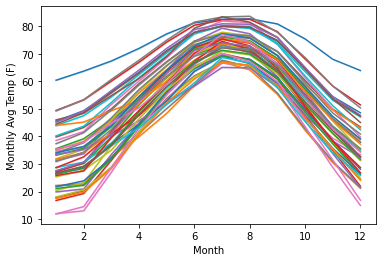

In [496]:
ax = plot_states_over_time(all_weather, states_only, 'Monthly Avg Temp (F)', time_col="Month")
ax.remove()

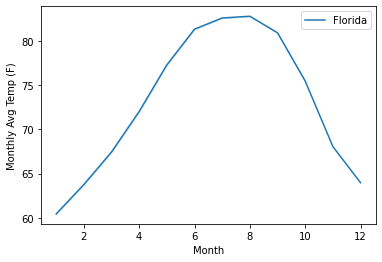

In [497]:
ax = plot_states_over_time(all_weather, ['Florida'], 'Monthly Avg Temp (F)', time_col="Month")

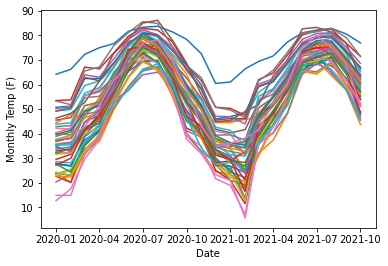

In [498]:
all_weather['Date'] = pd.to_datetime(all_weather['Year'].astype(str) + all_weather['Month'].astype(str), format='%Y%m')
all_weather.head()
ax = plot_states_over_time(all_weather, states_only, 'Monthly Temp (F)', time_col="Date")
ax.remove()

In [499]:
vaccine_data.loc[:,'Date'] = pd.to_datetime(vaccine_data['Date'])
vaccine_data.head()

,Date,State,Administered,Series_Complete_Yes
0,2021-11-18,Wisconsin,7894520,3440272
1,2021-11-18,Maine,2138582,964009
2,2021-11-18,Tennessee,7940729,3355930
5,2021-11-18,District of Columbia,1132019,449491
6,2021-11-18,South Carolina,6020753,2621180


In [500]:
vaccine_data['Date'].head()

0   2021-11-18
1   2021-11-18
2   2021-11-18
5   2021-11-18
6   2021-11-18
Name: Date, dtype: datetime64[ns]

Merge weather data first 

In [501]:
combined_covid_data = covid_data.merge(vaccine_data, how="left", 
                                   left_on=['Date','State'], right_on=['Date','State'])
combined_covid_data.loc[:,['Administered','Series_Complete_Yes']] = combined_covid_data[['Administered','Series_Complete_Yes']].fillna(0)
combined_covid_data['Month'] = combined_covid_data['Date'].dt.month
combined_covid_data['Year'] = combined_covid_data['Date'].dt.year
combined_covid_data.head(10)

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Recovered_rate_diff,Active,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,3470.0,NaN,NaN,0.000708,2.610160,0.0,0.0,4,2020
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,NaN,3635.0,165.0,0.000034,0.000741,2.651312,0.0,0.0,4,2020
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,NaN,3839.0,204.0,0.000042,0.000783,2.883886,0.0,0.0,4,2020
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,NaN,3957.0,118.0,0.000024,0.000807,2.895706,0.0,0.0,4,2020
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,NaN,4212.0,255.0,0.000052,0.000859,3.060990,0.0,0.0,4,2020
5,2020-04-17,Alabama,4903185,Friday,4557,92.0,0.000929,0.000019,148,15.0,...,NaN,4423.0,211.0,0.000043,0.000902,3.237804,0.0,0.0,4,2020
6,2020-04-18,Alabama,4903185,Saturday,4788,231.0,0.000977,0.000047,153,5.0,...,NaN,4559.0,136.0,0.000028,0.000930,3.247029,0.0,0.0,4,2020
7,2020-04-19,Alabama,4903185,Sunday,4978,190.0,0.001015,0.000039,157,4.0,...,NaN,4731.0,172.0,0.000035,0.000965,3.211948,0.0,0.0,4,2020
8,2020-04-20,Alabama,4903185,Monday,5163,185.0,0.001053,0.000038,163,6.0,...,NaN,4916.0,185.0,0.000038,0.001003,3.209293,0.0,0.0,4,2020
9,2020-04-21,Alabama,4903185,Tuesday,5404,241.0,0.001102,0.000049,183,20.0,...,NaN,5134.0,218.0,0.000044,0.001047,3.441790,0.0,0.0,4,2020


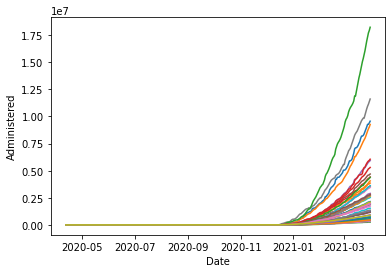

In [502]:
ax1 = plot_states_over_time(combined_covid_data, states_only, 'Administered', time_col="Date")
ax1.remove()

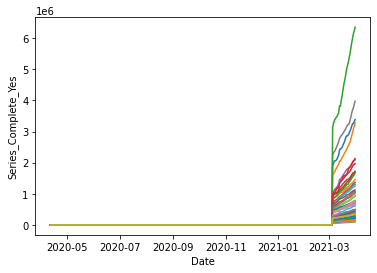

In [503]:
#same spikes in Series_Complete_Yes as seen in the original data set. 
ax2 = plot_states_over_time(combined_covid_data, states_only, 'Series_Complete_Yes', time_col="Date")
ax2.remove()

In [504]:
combined_data = combined_covid_data.merge(all_weather.drop(columns=['Date']), how="left", 
                                   left_on = ['Year','Month','State'], right_on=['Year','Month','State'])
combined_data.head()
combined_data[['Date', 'Month', 'State',
               'Monthly Avg Temp (F)', 
               'Monthly Temp (F)']].sample(5)

,Date,Month,State,Monthly Avg Temp (F),Monthly Temp (F)
6108,2020-07-11,7,Maine,67.015000,69.300000
2537,2020-06-10,6,District of Columbia,NaN,NaN
14968,2020-07-21,7,Utah,74.578571,74.328571
4899,2021-02-03,2,Iowa,23.184444,12.588889
749,2020-05-23,5,Arkansas,69.367778,66.711111


In [505]:
combined_data.head()

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year,Monthly Temp (F),Monthly Avg Temp (F)
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,NaN,0.000708,2.610160,0.0,0.0,4,2020,61.55,63.096875
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,165.0,0.000034,0.000741,2.651312,0.0,0.0,4,2020,61.55,63.096875
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,204.0,0.000042,0.000783,2.883886,0.0,0.0,4,2020,61.55,63.096875
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,118.0,0.000024,0.000807,2.895706,0.0,0.0,4,2020,61.55,63.096875
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,255.0,0.000052,0.000859,3.060990,0.0,0.0,4,2020,61.55,63.096875


In [506]:
combined_data.columns

Index(['Date', 'State', 'Total Pop', 'Day_of_Wk', 'Confirmed',
       'Confirmed_diff', 'Confirmed_rate', 'Confirmed_rate_diff', 'Deaths',
       'Deaths_diff', 'Deaths_rate', 'Deaths_rate_diff', 'Recovered',
       'Recovered_rate', 'Recovered_diff', 'Recovered_rate_diff', 'Active',
       'Active_diff', 'Active_rate_diff', 'Active_rate', 'Case_Fatality_Ratio',
       'Administered', 'Series_Complete_Yes', 'Month', 'Year',
       'Monthly Temp (F)', 'Monthly Avg Temp (F)'],
      dtype='object')

In [507]:
# spot check the ranges of weather data, 1 for each monthly temp type 
combined_data[combined_data['State']=='California'].groupby(['Year','Month']).first()[['Monthly Temp (F)','Monthly Avg Temp (F)']]

Monthly Temp (F)  Monthly Avg Temp (F)
Year Month                                        
2020 4             54.628571             53.115000
     5             61.928571             60.046429
     6             67.485714             67.745714
     7             73.385714             73.704286
     8             75.914286             72.679286
     9             71.500000             68.027143
     10            64.300000             58.906429
     11            49.385714             49.637857
     12            44.514286             43.107143
2021 1             44.542857             43.995000
     2             45.842857             45.232143
     3             46.571429             49.372857

## Training/Validation/Testing Data Split

Our COVID data spans 04-2020 to 03-2021, or 12 months. We will reserve 2 months each for validation and testing, leaving the first 8 months for training data. 

In [508]:
# split data into train/val/test                     
train_cut = pd.to_datetime('2020-12')
val_cut = pd.to_datetime('2021-2')

train = combined_data[combined_data['Date'] < train_cut]
val = combined_data[(combined_data['Date'] > train_cut) & (combined_data['Date'] < val_cut)]
test = combined_data[combined_data['Date'] >= val_cut]

display(train.groupby(['Year','Month']).first()[['Date']])
display(val.groupby(['Year','Month']).first()[['Date']])
display(test.groupby(['Year','Month']).first()[['Date']])

Date
Year Month           
2020 4     2020-04-12
     5     2020-05-01
     6     2020-06-01
     7     2020-07-01
     8     2020-08-01
     9     2020-09-01
     10    2020-10-01
     11    2020-11-01

,,Date
Year,Month,
2020,12,2020-12-02
2021,1,2021-01-01


Date
Year Month           
2021 2     2021-02-01
     3     2021-03-01

In [509]:
train.to_csv('../data/training_data.csv')
val.to_csv('../data/validation_data.csv')
test.to_csv('../data/testing_data.csv')
del val, test

## Exploratory Data Analysis

Our goal is create models predicting COVID cases, either total or by death. To start, let's explore any relationships between our features and these outcomes. 

Outcome features:
* `Confirmed_diff`/`Confirmed_rate_diff` - number of confirmed cases in the state for that day as a raw count and proportion of total population 
* `Deaths_diff`/`Deaths_rate_diff` - number of COVID deaths in the state for that day as a raw count and proportion of total population 

In [510]:
train.head()

,Date,State,Total Pop,Day_of_Wk,Confirmed,Confirmed_diff,Confirmed_rate,Confirmed_rate_diff,Deaths,Deaths_diff,...,Active_diff,Active_rate_diff,Active_rate,Case_Fatality_Ratio,Administered,Series_Complete_Yes,Month,Year,Monthly Temp (F),Monthly Avg Temp (F)
0,2020-04-12,Alabama,4903185,Sunday,3667,NaN,0.000748,NaN,93,NaN,...,NaN,NaN,0.000708,2.610160,0.0,0.0,4,2020,61.55,63.096875
1,2020-04-13,Alabama,4903185,Monday,3870,203.0,0.000789,0.000041,99,6.0,...,165.0,0.000034,0.000741,2.651312,0.0,0.0,4,2020,61.55,63.096875
2,2020-04-14,Alabama,4903185,Tuesday,4041,171.0,0.000824,0.000035,114,15.0,...,204.0,0.000042,0.000783,2.883886,0.0,0.0,4,2020,61.55,63.096875
3,2020-04-15,Alabama,4903185,Wednesday,4307,266.0,0.000878,0.000054,118,4.0,...,118.0,0.000024,0.000807,2.895706,0.0,0.0,4,2020,61.55,63.096875
4,2020-04-16,Alabama,4903185,Thursday,4465,158.0,0.000911,0.000032,133,15.0,...,255.0,0.000052,0.000859,3.060990,0.0,0.0,4,2020,61.55,63.096875


In [511]:
# some "negative" confirmed differences, 
# since confirmed is suppose to be cummulative, 
# these are reporting errors/adjustments. 
train['Confirmed_diff'].describe()

count    11368.000000
mean      1143.975545
std       1913.721872
min      -8491.000000
25%        164.000000
50%        536.000000
75%       1211.250000
max      32867.000000
Name: Confirmed_diff, dtype: float64

In [512]:
# count number of "decreasing" cumulative cases occur accross all states (in training)
# fairly distributed throughout the days of week, so not attributed to adjsutments on particular days 
train[train['Confirmed_diff']<0][['Date','Day_of_Wk','State','Confirmed_diff']].groupby('Day_of_Wk').count()

,Date,State,Confirmed_diff
Day_of_Wk,,,
Friday,3,3,3
Monday,5,5,5
Saturday,5,5,5
Sunday,4,4,4
Thursday,4,4,4
Tuesday,6,6,6
Wednesday,5,5,5


In [513]:
daily_case_rate_by_temps = train[['Monthly Avg Temp (F)', 'Monthly Temp (F)','Confirmed_rate_diff']]
daily_case_rate_by_temps.head()

,Monthly Avg Temp (F),Monthly Temp (F),Confirmed_rate_diff
0,63.096875,61.55,NaN
1,63.096875,61.55,0.000041
2,63.096875,61.55,0.000035
3,63.096875,61.55,0.000054
4,63.096875,61.55,0.000032


/Users/anyamichaelsen/Library/Python/3.9/lib/python/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


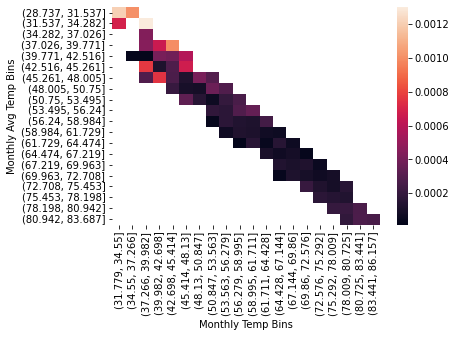

In [514]:
daily_case_rate_by_temps = train[['Monthly Avg Temp (F)', 'Monthly Temp (F)','Confirmed_rate_diff']]
daily_case_rate_by_temps.loc[:,'Monthly Avg Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Avg Temp (F)'], bins=20)
daily_case_rate_by_temps.loc[:,'Monthly Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Temp (F)'], bins=20)
daily_case_rate_by_temps = daily_case_rate_by_temps.groupby(['Monthly Avg Temp Bins', 'Monthly Temp Bins']).agg(np.mean)['Confirmed_rate_diff'].reset_index()
daily_case_rate_by_temps.head()
sns.heatmap(daily_case_rate_by_temps.pivot('Monthly Avg Temp Bins', 'Monthly Temp Bins', 'Confirmed_rate_diff'));

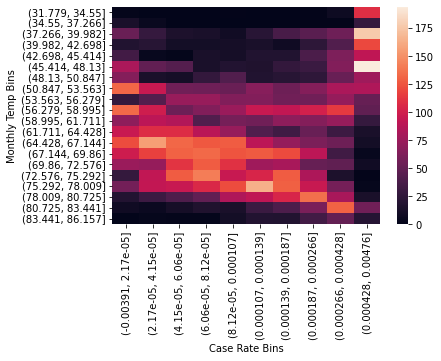

In [515]:
daily_case_rate_by_temps = train[['Monthly Avg Temp (F)', 'Monthly Temp (F)','Confirmed_rate_diff']]
daily_case_rate_by_temps.loc[:,'Monthly Temp Bins'] = pd.cut(daily_case_rate_by_temps['Monthly Temp (F)'], bins=20)
daily_case_rate_by_temps.loc[:,'Case Rate Bins'] = pd.qcut(daily_case_rate_by_temps['Confirmed_rate_diff'], q=10)#, bins=20)
daily_case_rate_by_temps.head()
counts_by_temp_and_cases = daily_case_rate_by_temps.groupby(['Monthly Temp Bins','Case Rate Bins']).count()['Monthly Avg Temp (F)'].reset_index().rename(columns={"Monthly Avg Temp (F)":"Counts"})
sns.heatmap(counts_by_temp_and_cases.pivot('Monthly Temp Bins','Case Rate Bins', 'Counts'));

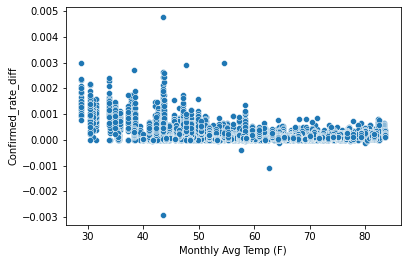

In [516]:
sns.scatterplot(y='Confirmed_rate_diff', x='Monthly Avg Temp (F)', data=train);

Expectation: hotter or colder months will lead to high case rates. Not exactly showing in the data... 

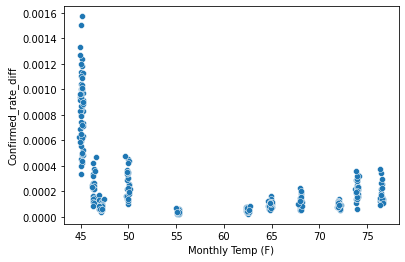

In [517]:
#https://stackoverflow.com/questions/64553046/seaborn-scatterplot-size-and-jitter for jitter method
def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)
ca_data = combined_data[combined_data['State']=='California']
jittered_monthly_temps = jitter(ca_data['Monthly Temp (F)'], 0.55)
sns.scatterplot(y=ca_data['Confirmed_rate_diff'], x=jittered_monthly_temps);

In [518]:
ca_data['Monthly Temp (F)'].nunique()

12